# Workplace fatalities
2014 Census of Fatal Occupational Injuries (preliminary data)
- Industry by event or exposure, 2014 (PDF 272K)

## NAICS explanation:
The first two digits designate the economic sector, the third digit designates the subsector, the fourth digit designates the industry group, the fifth digit designates the NAICS industry, and the sixth digit designates the national industry. The 5-digit NAICS code is the level at which there is comparability in code and definitions for most of the NAICS sectors across the three countries participating in NAICS (the United States, Canada, and Mexico). The 6-digit level allows for the United States, Canada, and Mexico each to have country-specific detail. A complete and valid NAICS code contains six digits.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from ggplot import *
import re
import seaborn as sns
%matplotlib inline
from textwrap import wrap

In [2]:
sns.set(style="white", context="talk")


In [26]:
def open_file():
    with open("fatalities.txt", "r") as ins:
        array = []
        for line in ins:
            array.append(line)
    return array

def clean_up(array):
    for line_num,line in enumerate(array):
        line = array[line_num].strip("\n")      # Remove newline character
        if "--" in line:                        # Change "--" to 0
            line = re.sub("--", "0", line)
        array[line_num] = line
    return array
    
def create_df(array):
    industry=[]
    naics=[]
    total=[]
    violence=[]
    transportation=[]
    fires=[]
    falls=[]
    exposure=[]
    contact=[]
    
    regex = re.compile("[A-Za-z(]")

    for line_num,line in enumerate(array):
        words = line.split()
        linetitle = []            
        for w in words:
            if regex.match(w[0]):
                words = words[1:]
                linetitle.append(w)
                industry_row=' '.join(linetitle)
        for w_num,w in enumerate(words):
            words[w_num]=w.replace(",","")      # remove commas in numbers
        if len(words)==8:                       # NAICS code is non-blank entry
            if len(words[0])==3:                # NAICS code is 3-digits, meaning sub-sector level
                industry.append(industry_row)
                naics.append(int(words[0]))
                total.append(int(words[1]))
                violence.append(int(words[2]))
                transportation.append(int(words[3]))
                fires.append(int(words[4]))
                falls.append(int(words[5]))
                exposure.append(int(words[6]))
                contact.append(int(words[7]))
                last_industry_name = industry_row
                
    # Create pandas dataframe object from dictionary
    d={'industry':industry,
       'naics': naics,
       'total': total,
       'violence': violence,
       'transportation': transportation,
       'fires': fires,
       'falls': falls,
       'exposure': exposure,
       'contact': contact}
    df = pd.DataFrame(d)
    cols = ['industry','naics','total','violence','transportation','fires','falls','exposure','contact']
    df = df[cols]
    return df

def modify_df(df):
    df['violenceP']=df.violence/df.total
    df['transportationP']=df.transportation/df.total
    df['firesP']=df.fires/df.total
    df['fallsP']=df.falls/df.total
    df['exposureP']=df.exposure/df.total
    df['contactP']=df.contact/df.total
    df=df.replace([np.inf, -np.inf], np.nan)   # replace any inf values with nan values
    return df

def create_barchart(df,column_name,num,title_string):
    tempdf=df.sort_values(by=column_name,ascending=False)[0:num]
    tempdff=tempdf[['industry','violence','transportation','fires','falls','exposure','contact']]
    tempdff=tempdff.set_index('industry')
    a=tempdff.index
    ax=tempdff.plot.barh(stacked=True,figsize=(8, 6),title=title_string);
    labels = [ '\n'.join(wrap(l, 37)) for l in a ]
    ax.set_xlabel("# of deaths")
    ax.set_yticklabels(labels)
    fig=ax.get_figure()
    return fig

In [48]:
if __name__ == "__main__":
    array = open_file()
    array = clean_up(array)
    df = create_df(array)
    #df = modify_df(df)  

In [49]:
df.head()

,industry,naics,total,violence,transportation,fires,falls,exposure,contact
0,Crop production,111,248,15,126,5,28,6,68
1,Animal production and aquaculture,112,156,22,71,4,12,3,44
2,Forestry and logging,113,92,0,21,0,4,0,64
3,"Fishing, hunting and trapping",114,25,0,19,0,0,3,0
4,Support activities for agriculture and forestry,115,43,0,27,0,0,4,8


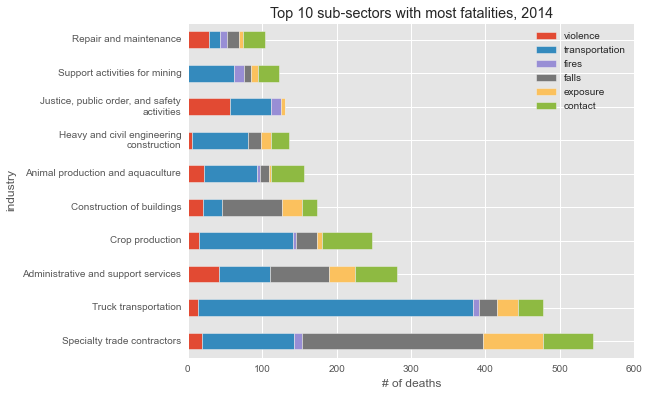

In [43]:
fig=create_barchart(df,'total',10,"Top 10 sub-sectors with most fatalities, 2014")
fig.savefig('total_top10.png',bbox_inches='tight', dpi=300)

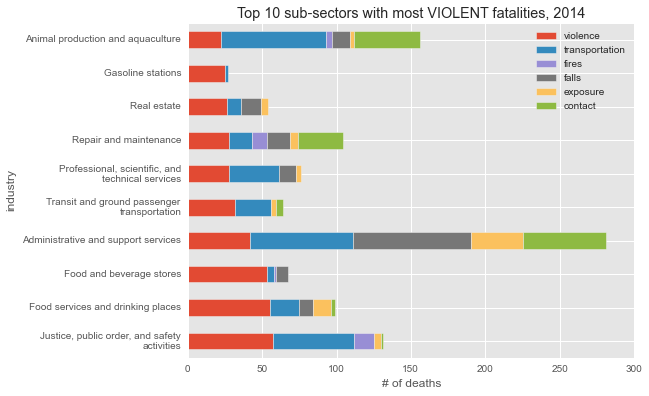

In [44]:
fig=create_barchart(df,'violence',10,"Top 10 sub-sectors with most VIOLENT fatalities, 2014")
fig.savefig('violence_top10.png',bbox_inches='tight', dpi=300)

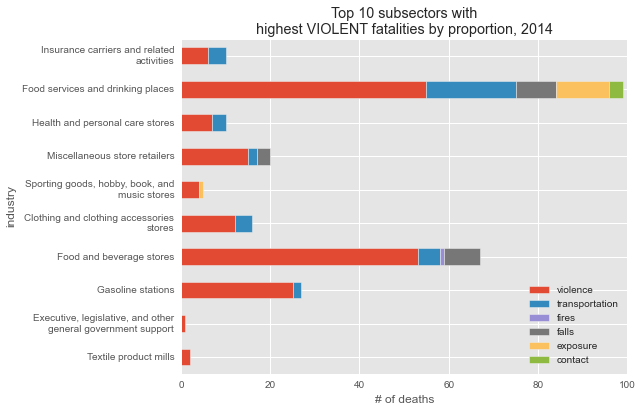

In [45]:
fig=create_barchart(df,'violenceP',10,"Top 10 subsectors with \nhighest VIOLENT fatalities by proportion, 2014")
fig.savefig('violenceP_top10.png',bbox_inches='tight', dpi=300)

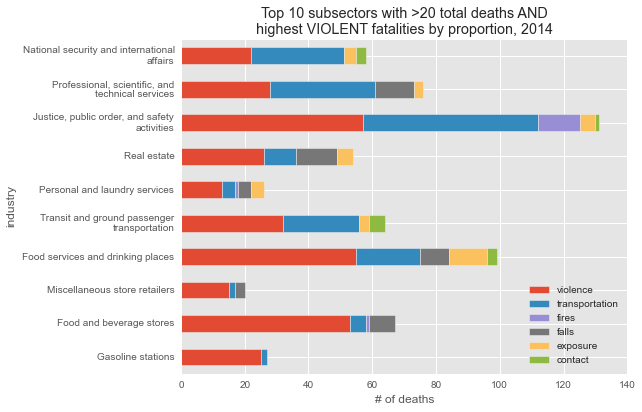

In [46]:
fig=create_barchart(df[df.total>20],'violenceP',10,"Top 10 subsectors with >20 total deaths AND\nhighest VIOLENT fatalities by proportion, 2014")
fig.savefig('violenceP_gr20_top10.png',bbox_inches='tight', dpi=300)